### Article Outline

* Loading libraries
* Loading dataset
* Data Preparation
* Generating and adding a `boxplot` [`matplotlib` style]
* Generating and adding a `boxplot` [`seaborn` style]
* Generating and adding a `boxenplot` [`seaborn` style]
* Combining plots using subplots

In [2]:
# Imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot using `matplotlib` and `seaborn`

* A box and whisker plot also called a box plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

* It also shows relationship between a numeric and categorical variable. 

* Create a 2 X 2 subplot

In [3]:
tips = pd.read_csv("datasets/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Creating a list of the column data 

In [4]:
# Pivot table returns reshaped DataFrame organized by given index / column values.
tips["id"] = tips.index
data_day = tips.pivot(index = "id",
                      columns = 'day',
                      values = 'tip')

data_day.head()

day,Fri,Sat,Sun,Thur
id,,,,
0,NaN,NaN,1.01,NaN
1,NaN,NaN,1.66,NaN
2,NaN,NaN,3.50,NaN
3,NaN,NaN,3.31,NaN
4,NaN,NaN,3.61,NaN


In [5]:
# Creating a list of columns with non-null values
l = [data_day.Fri.dropna(),
     data_day.Sat.dropna(),
     data_day.Sun.dropna(),
     data_day.Thur.dropna()]

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

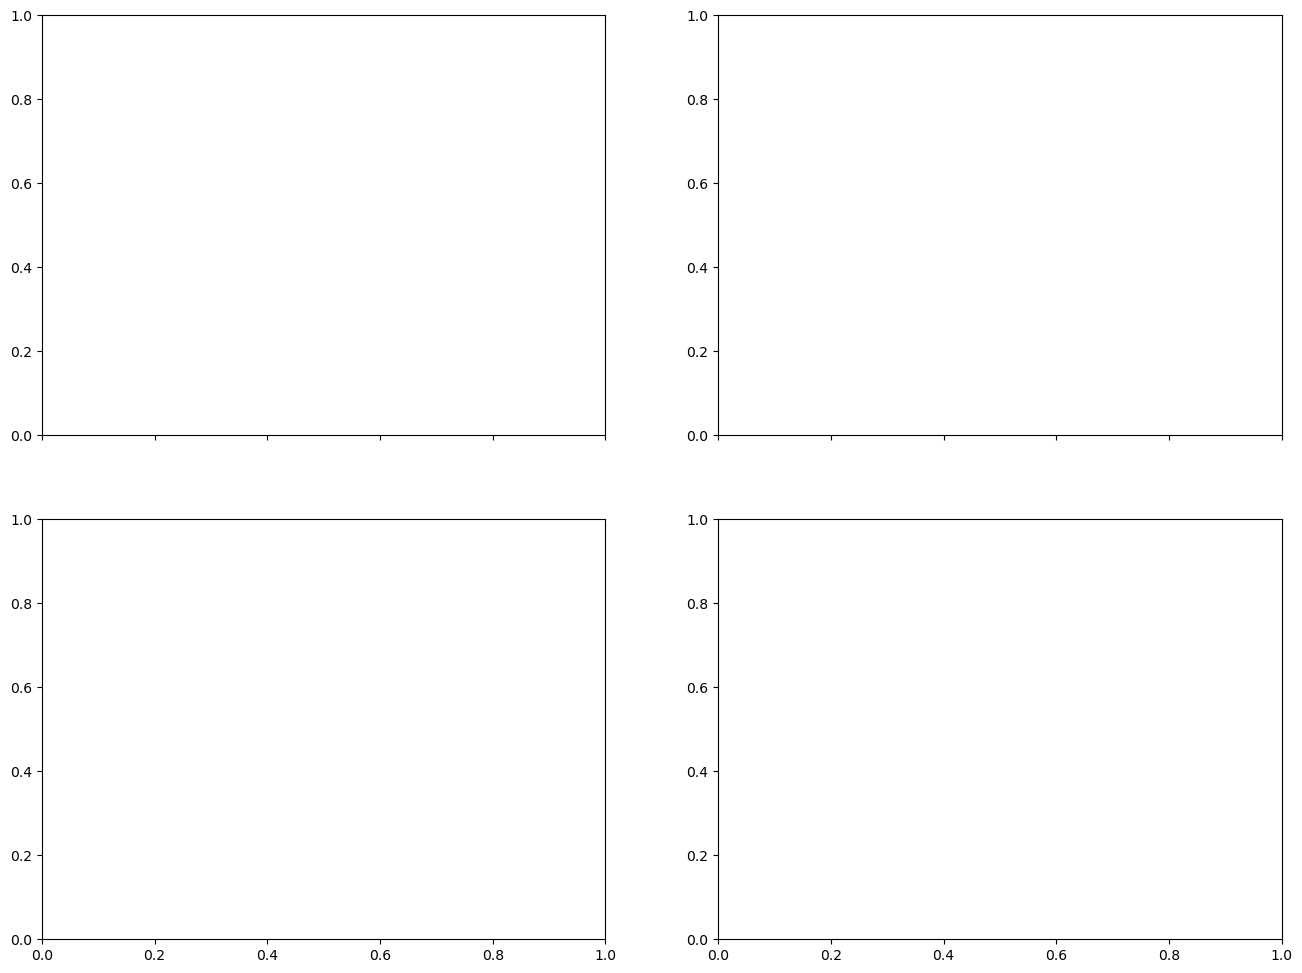

In [6]:
# Creating a subplots with rows = 2 and columns = 2
fig, ax = plt.subplots(figsize =  (16, 12), 
                       nrows = 2,
                       ncols = 2,
                       sharex = True)
ax

##### Creating boxplot and add to row = 0 and col = 0 position [matplotlib style]

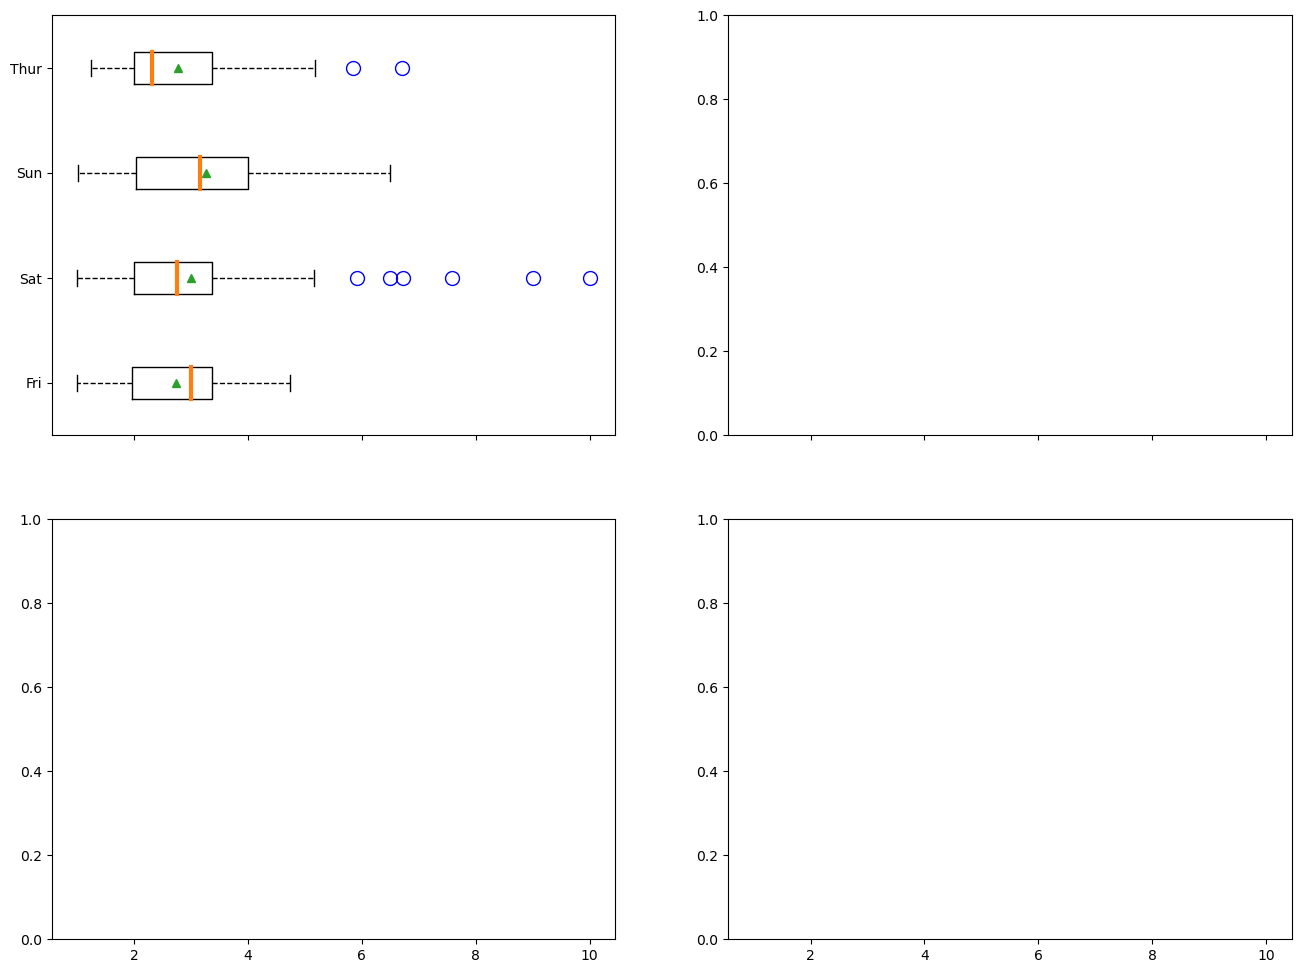

In [7]:
# Boxplot generation
ax[0, 0].boxplot(l,
    vert = False, # vertical
    widths = 0.3,
    labels = ["Fri", "Sat", "Sun", "Thur"],
    showmeans = True,     # Show the mean value
    showcaps = True,      # Show the caps on the ends of whiskers.
    showfliers = True,    # Show the outliers beyond the caps.
    whiskerprops = dict(linestyle = "dashed"),
    flierprops = dict(marker = "o", markersize = 10, markeredgecolor = "blue"),
    medianprops= dict(linestyle = "solid", linewidth = 3))

fig

##### Adding plot customisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


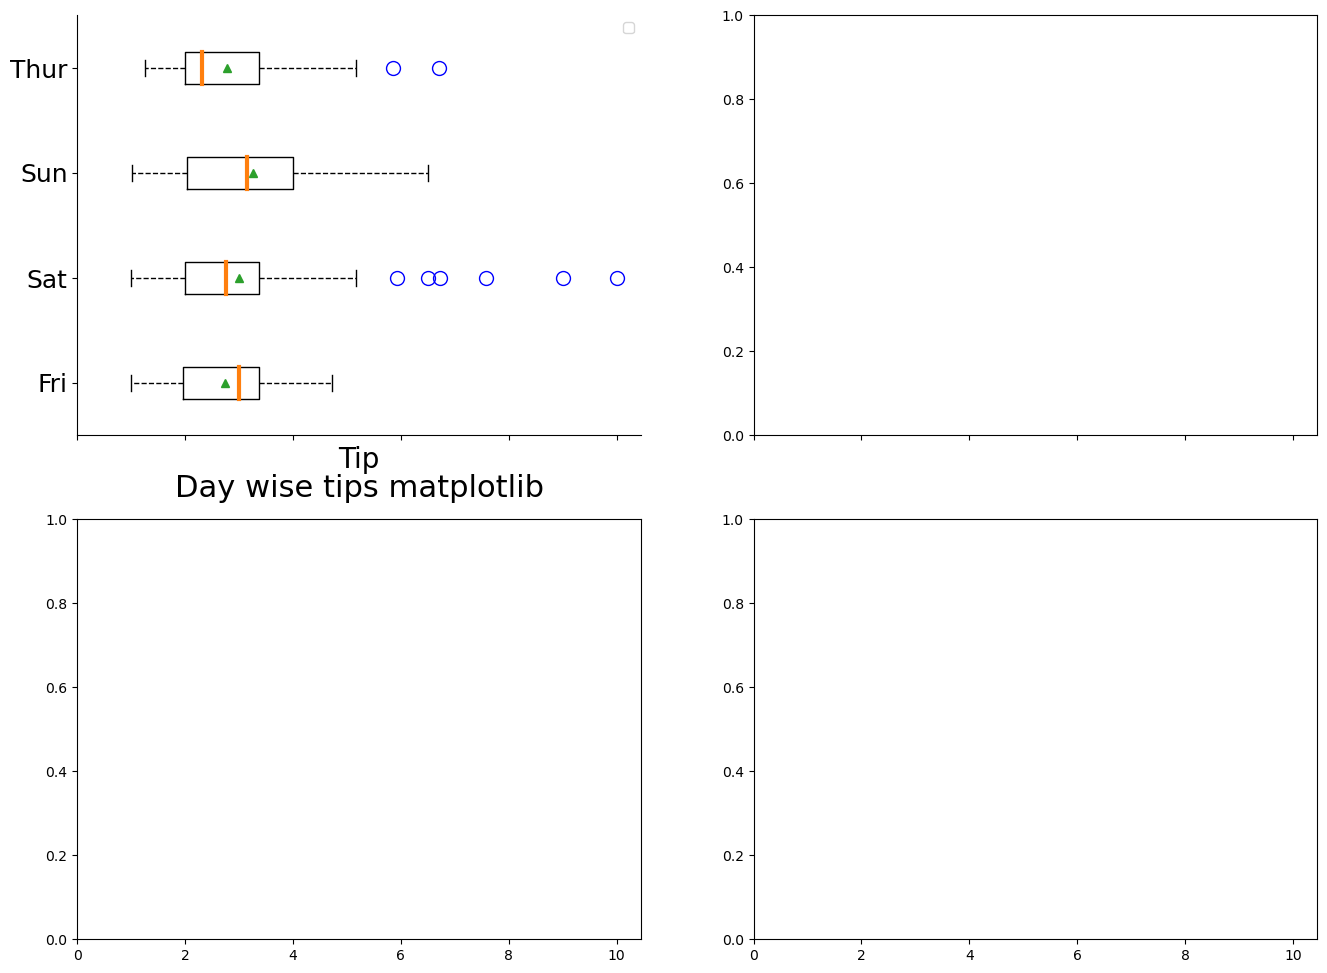

In [8]:
# Remove spines
for s in ["top", "right"]:
    ax[0,0].spines[s].set_visible(False)
        
# Add ticks and legends  
ax[0,0].tick_params(labelsize = 18)
ax[0,0].set_xlabel("Tip", size = 20)
ax[0,0].set_title("Day wise tips matplotlib", size = 22, y = -0.1, pad = -14)
ax[0,0].set_xticks([0,2,4,6,8,10])
ax[0,0].legend()

fig

##### Adding custom legend

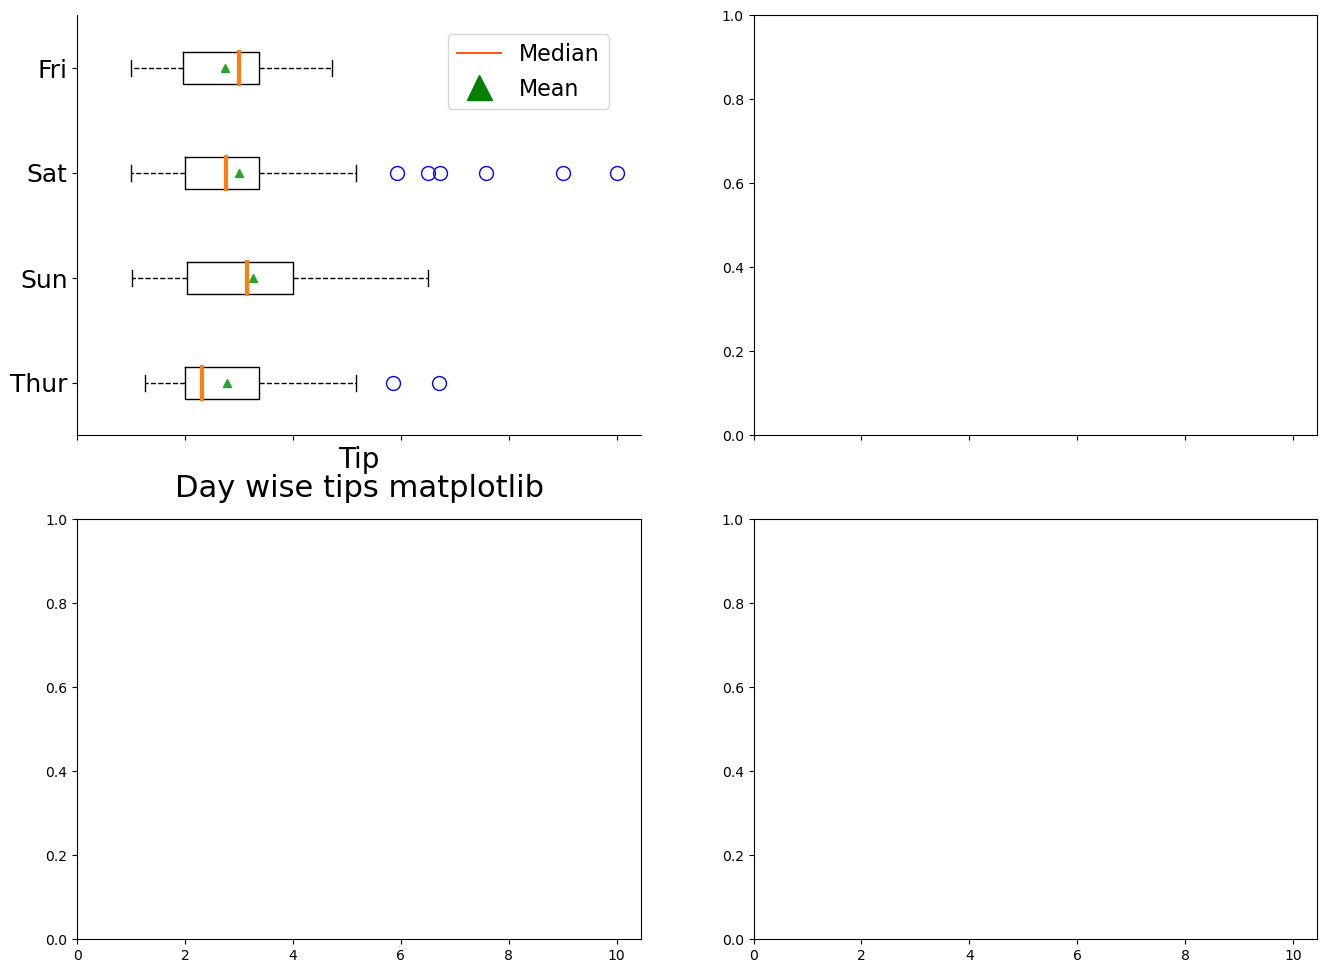

In [9]:
# Customise legend
from matplotlib.lines import Line2D
# import matplotlib.lines as mlines

# Add legend Median and Triangle
lmedian = Line2D([],[], color = "#FF5722", label = "Median", markersize = 18) # second orange legend line

green_triangle = Line2D([], [], color='green', marker='^', linestyle='None',
                                markersize = 18, label='Mean')

# Add legend shapes to legend handle
ax[0,0].legend(handles = [lmedian, green_triangle], loc = "lower center", ncol = 1, fontsize = 16) 
ax[0,0].legend_.set_bbox_to_anchor([0.8, 0.75]) 
ax[0,0].invert_yaxis()
fig

## Box plot using seaborn style

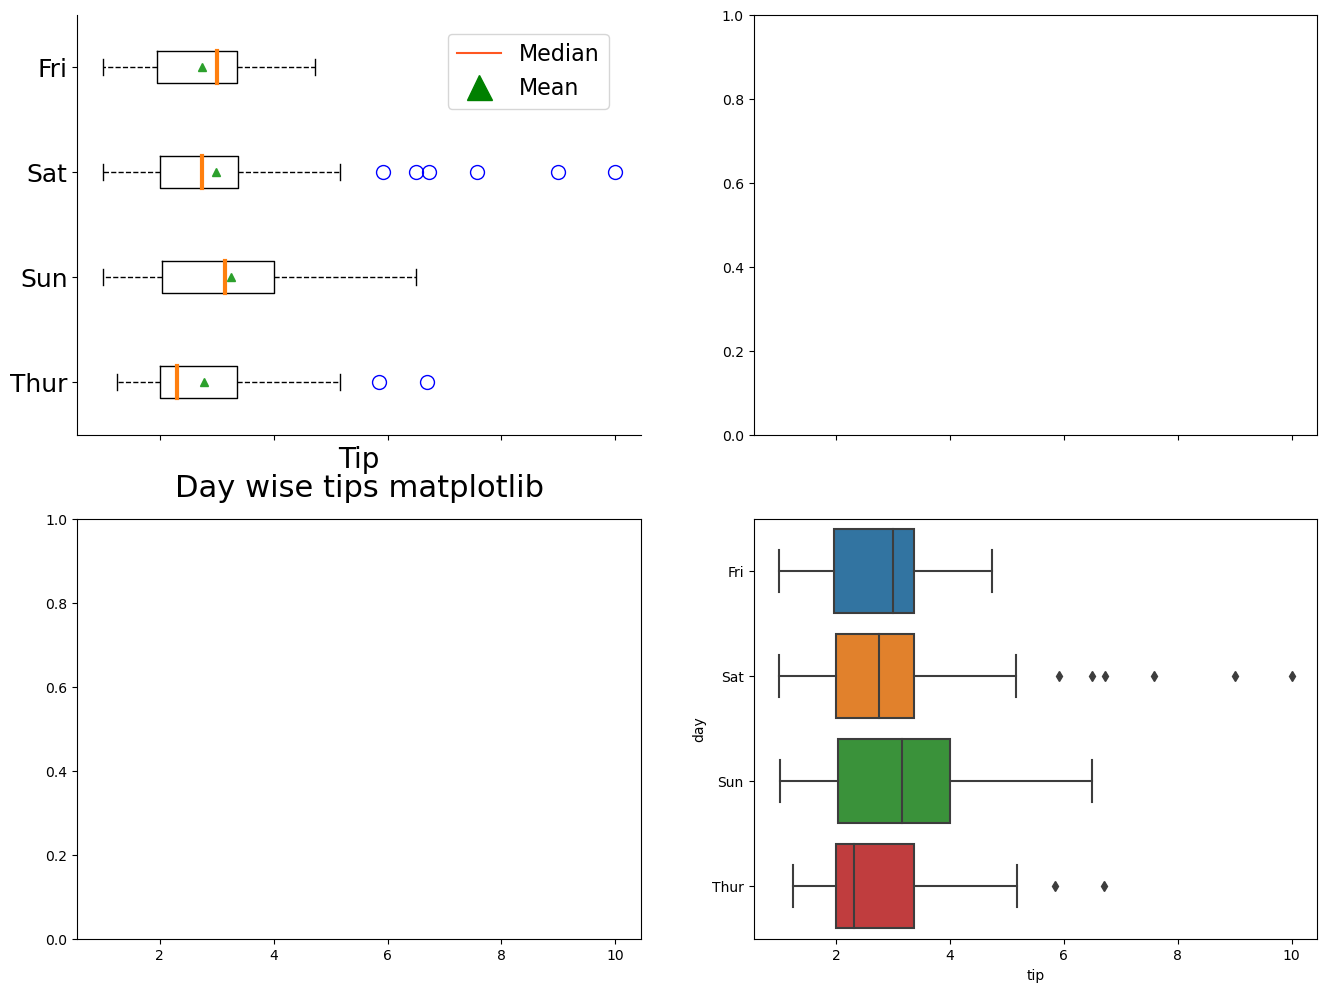

In [10]:
sns.boxplot(x = "tip",
            y = "day",
            data = tips,
            ax = ax[1,1],
            order = ["Fri", "Sat", "Sun", "Thur"])

fig

##### Plot customisation [same as matplotlib]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


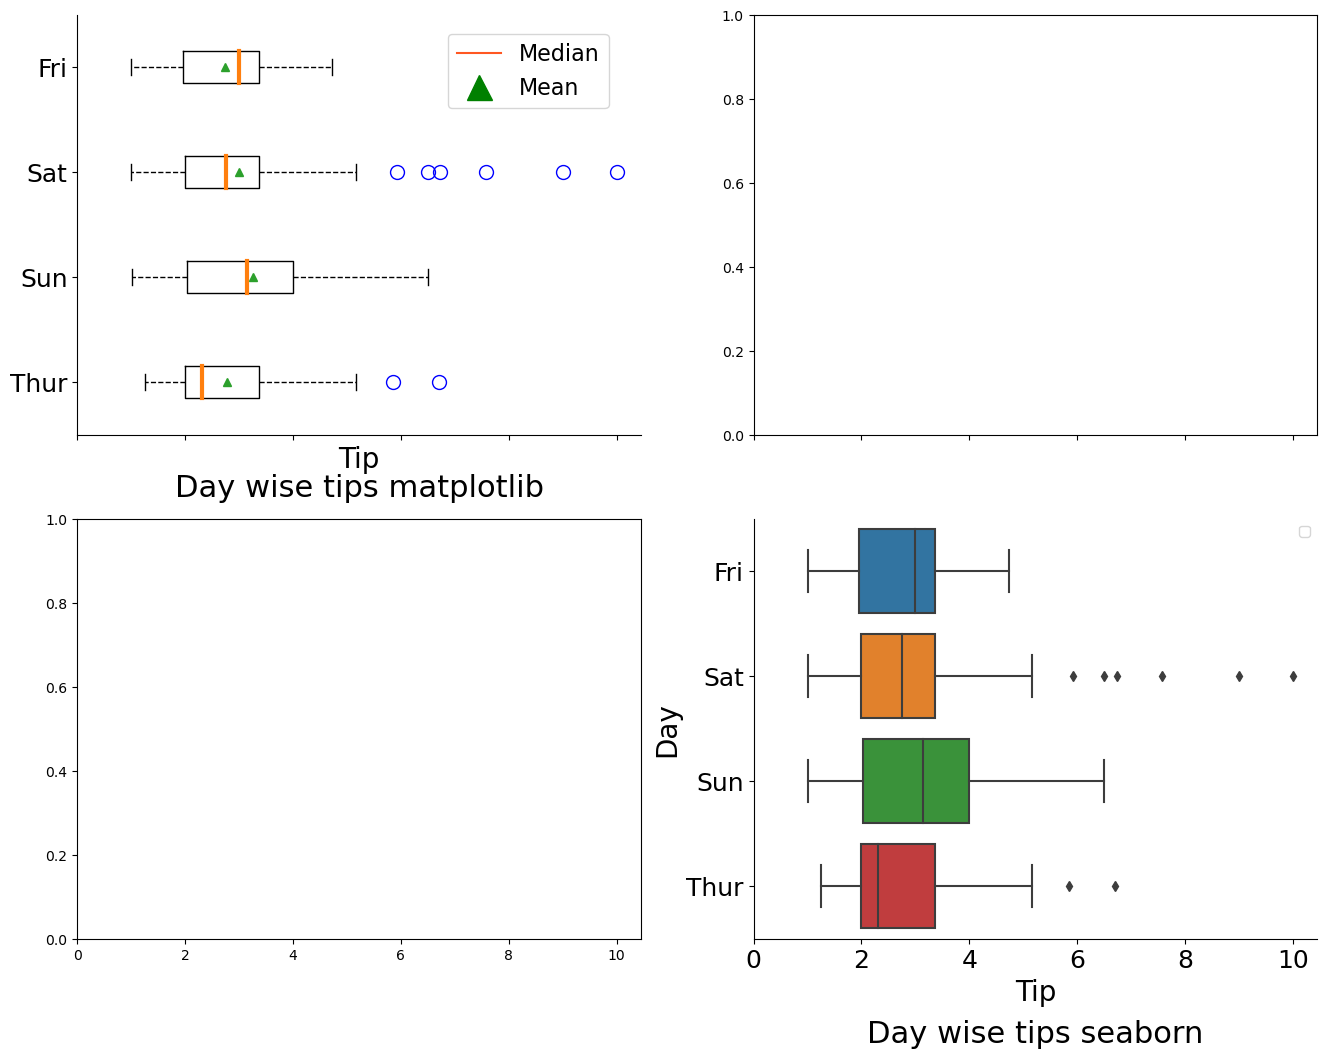

In [11]:

# Remove spines
for s in ["top", "right"]:
    ax[1,1].spines[s].set_visible(False)
        
# Add ticks and legends  
ax[1,1].tick_params(labelsize = 18)
ax[1,1].set_title("Day wise tips seaborn", size = 22, y = -0.2, pad = -14)
ax[1,1].set_xlabel("Tip", size = 20)
ax[1,1].set_ylabel("Day", size = 20)
ax[1,1].set_xticks([0,2,4,6,8,10])
ax[1,1].legend()

fig

In [12]:
import os

try:
    os.mkdir("images")
except:
    print("Directory already exists!")
    
fig.savefig("images/boxplot.png",
            dpi = 300,
            bbox_inches = "tight")

Directory already exists!


## Boxen plot/letter value plot

* It is similar to box plot but provides more information about the shape of the distribution, particularly in the tails.

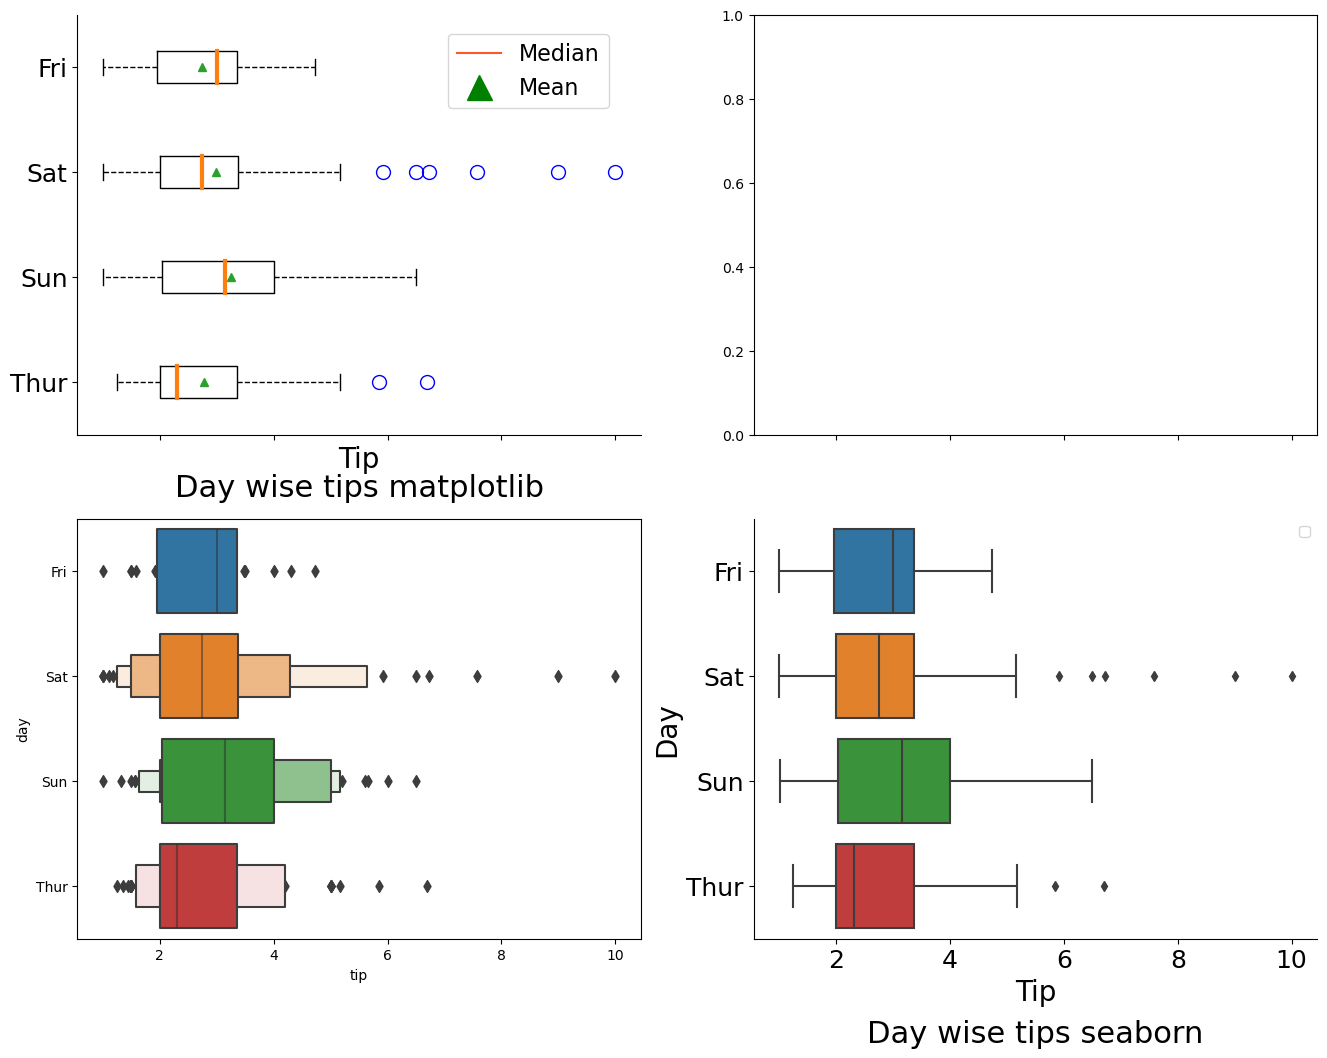

In [13]:
# fig, ax = plt.subplots(figsize = (10, 5))

# Generate a boxenplot
sns.boxenplot(x = "tip",
              y = "day",
              data = tips,
              ax = ax[1, 0],
              # hue = "sex",
              order = ["Fri", "Sat", "Sun", "Thur"])
fig

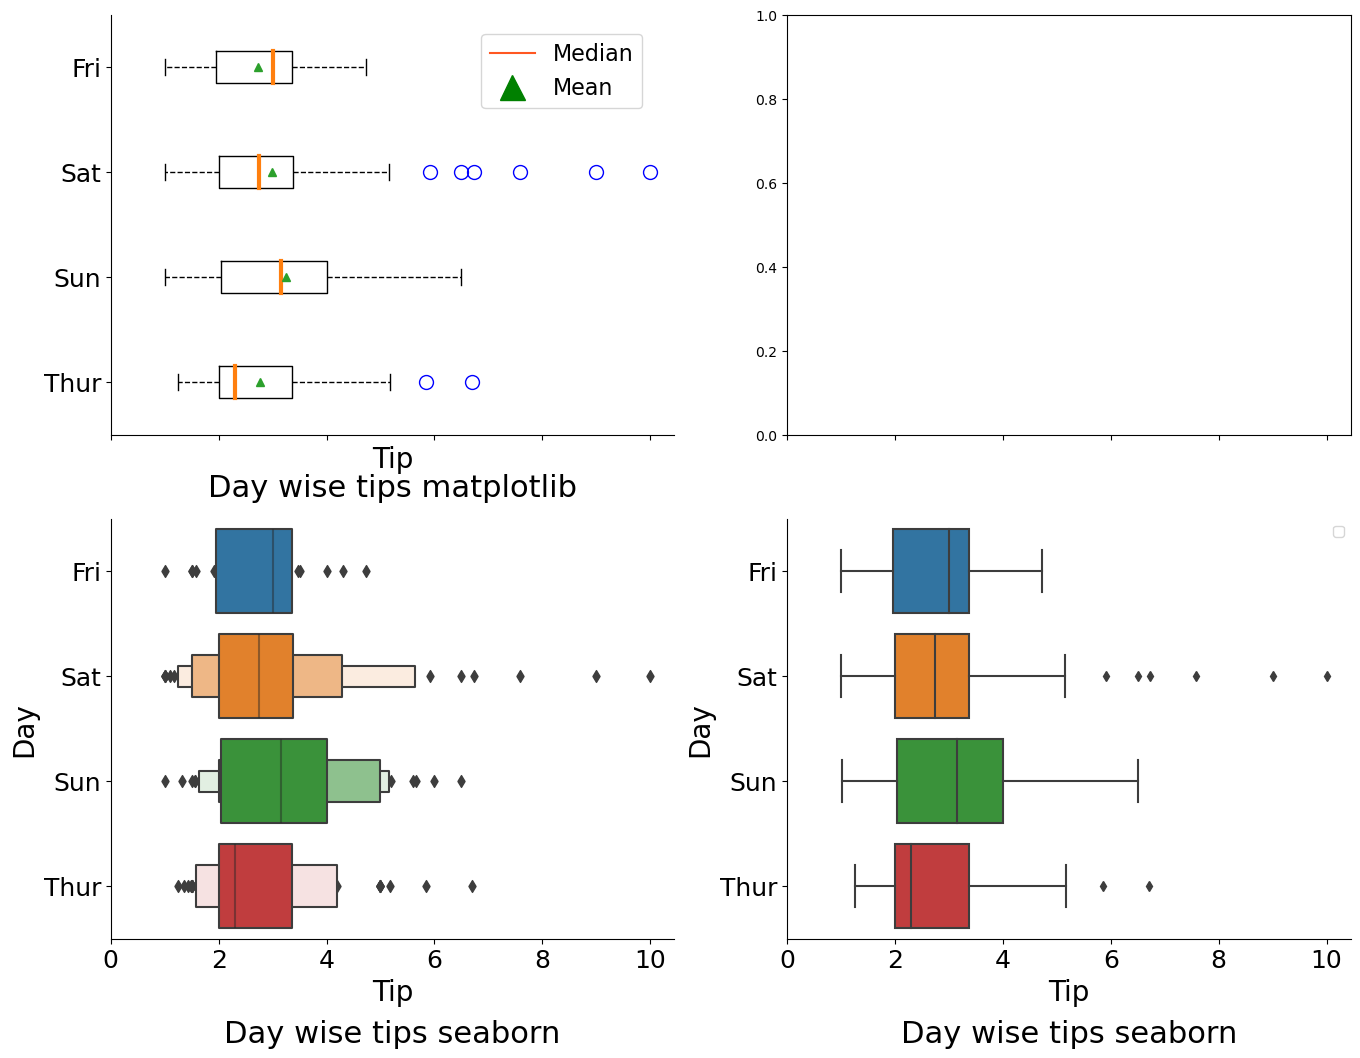

In [14]:
# Plot customisation

# Remove spines
for s in ["top", "right"]:
    ax[1,0].spines[s].set_visible(False)

# Change plot title and labels  
ax[1, 0].set_title("Day wise tips seaborn", size = 22, y = -0.2, pad = -14)
ax[1, 0].set_xlabel("Tip", size = 20)
ax[1, 0].set_ylabel("Day", size = 20)

# Modify tick and tick parameters
ax[1, 0].tick_params(labelsize = 18)
ax[1, 0].set_xticks([0,2,4,6,8,10])

fig

In [15]:
fig.savefig("images/boxenplot.png",
            dpi = 300,
            bbox_inches = "tight")